# 준비


1. 코드 실행에 필요한 라이브러리를 임포트합니다.

In [ ]:
import math
import copy
import numpy as np
import matplotlib.pyplot as plt

# 데이터 변수 선언

2. 가지고 있는 데이터 세트를 변수로 생성하고, 랜덤 시드를 설정합니다.

(참고) 랜덤 시드는 컴퓨터가 난수(무작위 수)를 생성할 때 사용하는 값으로, 같은 시드를 사용하면 매번 동일한 무작위 수열을 얻을 수 있습니다. 유전 알고리즘과 같이 확률적 요소가 포함되어 있는 코드를 실행할 때 시드를 설정해두면 나중에 같은 코드를 다시 실행하더라도 동일한 결과를 재현할 수 있습니다.

In [ ]:
# 데이터 세트 정의
x_data = [0.3, 1.1, 2.0, 2.4, 3.6, 4.5 , 4.8]
y_data = [1.48, 1.80, 5.0, 6.56, 9.32, 5.64, 3.0]
seed = 0
# 랜덤 시드 설정 (재현성을 위해)
np.random.seed(seed)

# 데이터 확인
`x` 데이터와 `y` 데이터가 어떠한 상관관계를 가지고 있는지 그래프로 그려 확인해 봅시다.

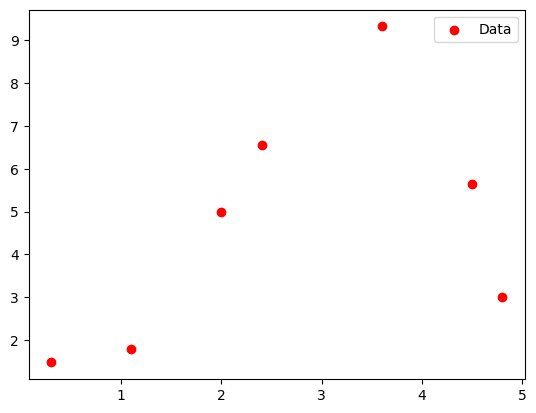

In [ ]:
plt.figure(1) # 그래프를 그리기 위해 이미지 객체 생성
plt.scatter(x_data, y_data, c='red', label='Data') # 데이터 정보를 점으로 표시
plt.legend() # 범례 생성
plt.show() # 이미지 출력

3. 3차 다항식 함수를 정의합니다.

- 입력 : x 는 가지고 있는 데이터의 x 값이며, a, b, c, d는 각각 3차 다항식의 계수를 의미합니다.
- 출력 : 주어진 계수의 3차 다항식에 x를 대입한 값을 반환합니다.

In [ ]:
# 3차 다항식 함수 f(x) 정의
def f(x, a, b, c, d):
    y = a + b * x + c * (x ** 2) + d * (x ** 3)
    return y

4. 평균제곱오차 (mse loss)를 계산하는 함수를 선언합니다.

In [ ]:
# MSE 손실 함수 정의
def mse_loss(x, y):
    return math.pow(abs(x - y), 2)

In [ ]:
a = mse_loss(1, 3)
a

4.0

5. 초기 개체군을 생성하는 함수를 정의합니다.

각 개체는 매개변수 a, b, c, d로 구성된 4차원의 배열이며, 값의 초기화 범위는 [-5, 5]입니다.

`np.random.rand(4)` 코드를 활용하여 크기가 4이고, 0과 1 사이의 범위를 갖는 numpy array를 얻을 수 있습니다. 이 값에 연산을 추가하여 -5와 5사이의 값을 갖는 numpy array로 변환하고, `population`이라는 이름의 리스트에 추가합니다.

In [ ]:
# 초기 개체군 생성 함수
def initialize(num_population):
    population = []
    for i in range(num_population):
        a = -5 + np.random.rand(4) * 10  # 매개변수 a, b, c, d의 초기화 범위는 [-5, 5]
        population.append(a)
    return population

In [ ]:
initialize(100)

[array([-0.76345201,  1.45894113, -0.62412789,  3.91773001]),
 array([ 4.63662761, -1.16558481,  2.91725038,  0.2889492 ]),
 array([ 0.68044561,  4.25596638, -4.28963942, -4.128707  ]),
 array([-4.79781603,  3.32619846,  2.78156751,  3.70012148]),
 array([ 4.78618342,  2.99158564, -0.38520638,  2.80529176]),
 array([-3.81725574,  1.39921021, -3.56646713,  4.44668917]),
 array([ 0.21848322, -0.8533806 , -2.35444388,  2.74233689]),
 array([-0.43849668,  0.68433949, -4.812102  ,  1.17635497]),
 array([1.12095723, 1.16933997, 4.43748079, 1.81820299]),
 array([-1.40492099, -0.62968046,  1.97631196, -4.39774528]),
 array([ 1.66766715,  1.7063787 , -2.89617439, -3.71073702]),
 array([-1.84571649, -1.36289229,  0.7019677 , -0.61398487]),
 array([ 4.88373838, -3.97955189, -2.91123244, -3.38690482]),
 array([ 1.53108325, -2.46708397, -0.33689227, -2.55574408]),
 array([-3.41030416, -3.89624859,  1.56329589, -3.61817049]),
 array([-3.03417638, -1.31274829,  3.2099323 , -4.02898724]),
 array([ 3.3

6. `calculate_fitness()` : 입력된 개체 `a`의 적합도를 계산하여 반환하는 함수를 작성합니다.

`calculate_fitness` 함수는 데이터 집합 `x_data`의 각 요소에 대해 함수 `f(x)`를 사용하여 추정 값을 계산한 후, 이 추정 값과 실제 `y_data` 간의 오차를 `mse_loss` 함수를 통해 구합니다. 각 오차는 손실로 처리되어 `fitness` 변수에서 빼줌으로써, 손실이 클수록 적합도가 작아지도록 합니다. 최종 `fitness` 값은 개체 `a`가 데이터에 얼마나 잘 맞는지를 나타내며, 이 값을 통해 개체의 적합도를 평가할 수 있습니다.

`*a`는 배열 `a`의 개별 값을 함수 `f(x)`의 매개변수로 전달하기 위해 사용되었습니다.


In [ ]:

# 적합도 계산 함수
def calculate_fitness(a):
    fitness = 0.0
    for i in range(len(x_data)): # data 의 총 개수만큼 개별 data에 대해 손실 계산
        f_x = f(x_data[i], *a)  # 개체 a에 대해 추정치 f(x) 계산
        loss = mse_loss(f_x, y_data[i])  # f(x)와 실제 y_data의 손실 계산
        fitness -= loss  # 손실이 클수록 적합도가 작아지도록 구성
    return fitness


7. `selection()` : 주어진 개체군에서 엘리트와 룰렛 선택 방식을 활용해 새로운 부모 집합을 생성하고 반환합니다. 선택 과정은 각 개체의 적합도에 기반해 이루어지며, 최적 개체의 적합도와 염색체 정보도 반환됩니다.

* `population`: 개체군을 나타내는 리스트로, 각 개체는 염색체의 배열로 구성됩니다.

* `_num_elite`: 상위 적합도를 가진 개체 수로, 선택된 엘리트 개체의 개수를 지정합니다.

* `_num_roulette`: 룰렛 선택 방식에서 선택할 개체 수로, 확률에 따라 선택된 개체의 개수를 지정합니다.

### 함수의 주요 과정:
- **적합도 계산**:
  - 개체군의 각 개체에 대해 `calculate_fitness`를 호출하여 적합도를 계산하고 `fitness` 리스트에 저장합니다.

- **적합도 기준 정렬**:
  - `np.argsort(fitness)[::-1]`를 통해 적합도 값을 내림차순으로 정렬하고, 상위 엘리트 개체의 인덱스를 반환합니다.
  
- **엘리트 선택**:
  - 상위 `_num_elite`개의 엘리트를 선택하고, 깊은 복사(`copy.deepcopy`)를 사용하여 `elite` 리스트에 추가합니다.
  - 최상위 개체의 적합도는 `top_fitness`에 저장하여 최적 적합도를 반환합니다.

- **룰렛 선택 확률 계산**:
  - 적합도 값을 역수로 변환하여 `fitness_inverse` 리스트에 저장합니다. 이 값을 `total_inverse_fitness`로 나누어 각 개체의 선택 확률을 계산하고, 확률 리스트 `selection_probs`에 저장합니다.
  
- **최상위 5개 개체 출력**:
  - 상위 5개의 엘리트 개체의 적합도, 염색체 정보, 선택 확률을 출력합니다.

- **룰렛 선택**:
  - `np.random.choice`를 사용하여 `selection_probs`에 따라 `_num_roulette` 개체를 무작위로 선택합니다.
  
- **부모 개체군 생성**:
  - 엘리트 개체와 룰렛 선택된 개체를 결합하여 `parents` 리스트에 저장합니다. `parents`는 반환값으로 최적 개체 정보(`top_fitness`, `top_individual`)와 함께 반환됩니다.
  
이렇게 반환된 부모 개체군은 다음 세대의 개체군을 생성하는 데 사용됩니다.


In [ ]:
def selection(population, _num_elite=10, _num_roulette=10):
    fitness = []
    for i in range(len(population)):
        fitness.append(calculate_fitness(population[i]))
    rank = np.argsort(fitness)[::-1]

    elite = [copy.deepcopy(population[i]) for i in rank[:_num_elite]]
    top_fitness = fitness[rank[0]]

    fitness_inverse = [1 / fitness[i] for i in range(len(fitness))]
    selection_probs = [f_inv / sum(fitness_inverse) for f_inv in fitness_inverse]

    selected = np.random.choice(len(population),
                                _num_roulette,
                                p=selection_probs,
                                replace=True)
    parents = elite + [copy.deepcopy(population[s]) for s in selected]
    return parents, top_fitness, np.copy(population[rank[0]])


8. `mutation()`: 주어진 염색체에서 하나의 유전자를 무작위로 선택해 돌연변이를 수행합니다. 돌연변이 연산은 덧셈 또는 곱셈으로 이루어지며, 각 연산은 50%의 확률로 적용됩니다. 변형된 유전자는 최대값과 최소값 범위 내에 유지되도록 보정됩니다.

* `chromosome`: 개체의 염색체를 나타내는 리스트 또는 배열로, 돌연변이를 적용할 대상입니다.

### 함수의 주요 과정:
- **무작위 인덱스 선택**:
  - `np.random.randint(0, len(chromosome))`를 통해 염색체에서 돌연변이를 적용할 유전자의 인덱스를 무작위로 선택합니다.
  
- **돌연변이 연산 적용**:
  - `np.random.rand()`를 사용해 0.5보다 작은 경우 덧셈 연산, 그 외에는 곱셈 연산을 수행합니다.
  
  - **덧셈 연산**:
    - 평균이 0, 표준편차가 1인 표준정규분포에 따라 생성된 난수를 현재 유전자 값에 더합니다.
    
  - **곱셈 연산**:
    - 평균이 0, 표준편차가 1인 표준정규분포에 따른 난수를 현재 유전자 값에 곱합니다.
  
- **범위 보정**:
  - 변형된 유전자가 최소값 -5.0 이하로 내려가거나 최대값 5.0을 초과하지 않도록 합니다. 초과한 경우, 각 유전자는 최솟값 -5.0 또는 최댓값 5.0으로 보정됩니다.

- **결과 반환**:
  - 돌연변이가 적용된 `chromosome`을 반환합니다.


In [ ]:
# 돌연변이 함수 정의
def mutation(chromosome):
    index = np.random.randint(0, len(chromosome))

    if np.random.rand() < 0.5:
        chromosome[index] = chromosome[index] + np.random.randn()
        if chromosome[index] > 5.0:
            chromosome[index] = 5.0
        elif chromosome[index] < -5.0:
            chromosome[index] = -5.0
    else:
        chromosome[index] = chromosome[index] * np.random.randn()
        if chromosome[index] > 5.0:
            chromosome[index] = 5.0
        elif chromosome[index] < -5.0:
            chromosome[index] = -5.0
    return chromosome

9. `crossover()` : 주어진 부모 개체 `p1`과 `p2`로부터 교차(crossover) 연산을 수행하여 두 자식 개체를 생성합니다. 이 교차 연산은 선택된 인덱스에서 부모 간의 값을 교환하여 새로운 자식 개체를 만듭니다.

* `p1`, `p2`: 교차 연산을 통해 자식을 생성하는 두 부모 개체입니다. 각 개체는 값의 배열로 구성됩니다.

### 함수의 주요 과정:
- **무작위 인덱스 선택**:
  - `np.random.choice(4, 2, replace=False)`를 사용하여 4개의 인덱스 중 2개의 인덱스를 무작위로 선택합니다. 선택된 인덱스는 교환이 발생할 위치를 의미합니다.

- **자식 초기화**:
  - `child1`, `child2`는 각각 `p1`과 `p2`의 복사본으로 초기화됩니다. 이는 부모 개체의 정보를 기반으로 자식을 시작할 수 있도록 합니다.

- **값 교환**:
  - 선택된 두 인덱스 위치에서 `p1`과 `p2`의 값을 교환하여 `child1`과 `child2`의 해당 위치 값을 서로 맞바꿉니다. 이 과정은 부모의 일부 특성을 공유하는 자식을 생성하도록 합니다.
  
- **결과 반환**:
  - 교차 연산을 마친 두 자식 개체 `child1`과 `child2`를 반환합니다.


In [ ]:
def crossover(p1, p2):
    # (1) 4개의 인덱스 중에서 랜덤하게 2개의 인덱스 선택
    indices = np.random.choice(4, 2, replace=False)

    # child1, child2를 p1, p2의 복사본으로 초기화
    child1, child2 = p1.copy(), p2.copy()

    # (2) 선택된 인덱스 위치에서 p1, p2의 값 교환
    for index in indices:
        child1[index] = p2[index]
        child2[index] = p1[index]

    return child1, child2

`crossover()` 함수를 활용하여 자식 개체를 만드는 코드의 예시입니다. 결과를 확인해 보세요.

In [ ]:
p1 = [1.0, 2.1, 3.2, 4.3]
p2 = [0.1, 0.2, 0.3, 0.4]
child1, child2 = crossover(p1, p2)
print("Child 1:",child1)
print("Child 2:",child2)

Child 1: [0.1, 2.1, 3.2, 0.4]
Child 2: [1.0, 0.2, 0.3, 4.3]


10. `reproduction()` : 주어진 부모 개체들을 기반으로 새로운 세대(`new_population`)를 생성합니다. 부모 개체들 중 일부는 엘리트로 유지하며, 나머지 개체들은 교차(crossover)와 돌연변이(mutation) 연산을 통해 생성됩니다.

* `parents`: 부모 개체들을 담은 리스트입니다. 이 부모 개체들을 활용해 새로운 세대를 생성합니다.
* `_num_population`: 생성할 새로운 세대의 개체 수입니다.
* `_num_elite`: 엘리트 개체 수로, 변형 없이 그대로 유지되는 개체 수입니다.
* `_p_crossover`: 교차 연산이 발생할 확률입니다.
* `_p_mutation`: 돌연변이 연산이 발생할 확률입니다.

### 함수의 주요 과정:
- **엘리트 개체 보존**:
  - `parents[:_num_elite]`를 통해 부모 리스트의 상위 엘리트 개체들을 그대로 복사하여 `new_population`에 추가합니다. 이로써 가장 우수한 개체들은 변형 없이 새로운 세대에 남습니다.

- **교차 및 돌연변이 연산을 통한 개체 생성**:
  - `new_population`의 개체 수가 `_num_population`에 도달할 때까지 반복합니다.
  - `np.random.choice`를 통해 부모 리스트에서 두 개의 개체를 무작위로 선택하여 `p1`과 `p2`로 지정합니다.
  
- **교차 연산**:
  - `np.random.rand() < _p_crossover` 조건을 통해 `_p_crossover` 확률로 `crossover` 함수를 호출하여 `p1`과 `p2`의 유전자를 교환하고, 이를 통해 `child1`과 `child2`를 생성합니다. 교차 연산이 수행되지 않으면 원본 부모 개체가 자식 개체로 추가됩니다.

- **돌연변이 연산**:
  - `np.random.rand() < _p_mutation` 조건에 따라 `_p_mutation` 확률로 각각 `child1`과 `child2`에 대해 `mutation` 함수를 호출하여 유전자를 변형시킵니다.

- **새로운 세대 구성**:
  - 생성된 자식 개체들을 `new_population`에 추가합니다. 만약 `new_population`의 개체 수가 `_num_population`을 초과할 경우, 초과된 개체는 제외하고 반환합니다.

이 함수는 유전 알고리즘의 세대 교체 과정에서 엘리트 보존, 교차, 돌연변이 연산을 통해 개체 다양성을 유지하고, 새로운 세대를 생성하도록 설계되었습니다.


In [ ]:

def reproduction(parents, _num_population, _num_elite, _p_crossover=0.9, _p_mutation=0.1):
    new_population = list()  # 초기 부모 리스트에 Elite 10과 선택된 10 포함

    # Elite 개체는 new_population에 그대로 남김
    elite = copy.deepcopy(parents[:_num_elite])
    new_population.extend(elite)

    while len(new_population) < _num_population:
        # 부모 중에서 두 개체 무작위 선택
        parents_indices = np.random.choice(len(parents), 2, replace=False)
        p1 = copy.deepcopy(parents[parents_indices[0]])
        p2 = copy.deepcopy(parents[parents_indices[1]])

        # Crossover 수행 여부
        if np.random.rand() < _p_crossover:
            child1, child2 = crossover(p1, p2)
        else:
            child1, child2 = p1, p2  # crossover가 없으면 원본 유지

        # Mutation 수행 여부
        if np.random.rand() < _p_mutation:
            child1 = mutation(child1)
        if np.random.rand() < _p_mutation:
            child2 = mutation(child2)

        # New population에 추가
        new_population.extend([child1, child2])

    # 만약 population 크기가 초과한 경우 자르기
    return new_population[:_num_population]

11. `run_GA()` : 유전 알고리즘(Genetic Algorithm, GA)을 실행하여 목표 조건을 만족하는 최적의 개체를 찾아내는 함수입니다.

* `_num_population`: 초기 개체군의 크기입니다.
* `_num_elite`: 세대마다 유지되는 엘리트 개체 수입니다.
* `_p_crossover`: 교차 연산이 발생할 확률입니다.
* `_p_mutation`: 돌연변이 연산이 발생할 확률입니다.

### 함수의 주요 과정:
- **초기 설정 및 개체군 초기화**:
  - `initialize` 함수를 호출하여 `_num_population` 크기의 초기 개체군을 생성합니다.
  - `top_fitness`는 최고 적합도를 추적하며 초기화됩니다.
  - `top_fitness_record` 리스트는 각 세대의 최고 적합도를 저장합니다.
  - `top_individual`은 최고 적합도를 지닌 개체를 저장합니다.

- **세대 반복 실행**:
  - `while top_fitness <= -1.0` 조건을 통해 목표 적합도가 달성될 때까지 반복하며, 각 세대마다 개체군을 발전시킵니다.
  - **세대 표시**: 세대 수를 증가시키고, 현재 세대를 콘솔에 출력합니다.
  - **선택 및 재생산**:
    - `selection` 함수를 통해 엘리트 개체와 룰렛 선택을 사용해 부모를 선택합니다. 각 세대에서 최상위 적합도와 그에 해당하는 개체(`top_individual`)가 갱신됩니다.
    - `reproduction` 함수를 호출해 교차와 돌연변이 연산을 통해 새로운 세대를 생성합니다.
  - **적합도 기록**: `top_fitness_record`에 현재 세대의 최고 적합도를 추가하고, 최상위 개체와 해당 적합도를 출력합니다.

- **결과 반환**:
  - 최종적으로 세대가 종료된 후 최종 개체군(`population`), 최고 적합도의 개체(`top_individual`), 각 세대의 최고 적합도를 담은 `top_fitness_record`를 반환합니다.



In [ ]:
# 유전 알고리즘 실행 함수
def run_GA(_num_population=100, _num_elite=20, _p_crossover=0.9, _p_mutation=0.7):
    _num_roulette = _num_population - _num_elite
    generations = 0

    population = initialize(_num_population) # 초기 개체군 생성
    top_fitness = -float("inf")
    top_fitness_record = []
    top_individual = None

    while top_fitness <= -3.0:
        generations += 1
        print('-' * 15 + ' Generation ' + str(generations) + ' ' + '-' * 15)
        parents, top_fitness, top_individual = selection(population, _num_elite=_num_elite, _num_roulette=_num_roulette)
        population = reproduction(parents, _num_population, _num_elite=2, _p_crossover=0.7, _p_mutation=0.9)
        top_fitness_record.append(top_fitness)
        print('Top Individual:', [round(t, 2) for t in top_individual], round(top_fitness,3))

    return population, np.copy(top_individual), top_fitness_record


`run_GA()` 함수를 실행하여 유전알고리즘을 실행해 봅시다.

In [ ]:
# 알고리즘 실행
import time
start = time.time()
np.random.seed(1)
population, top_individual, top_fitness_record = run_GA(_num_population=100,
                                                        _num_elite=10,
                                                        _p_crossover=0.0,
                                                        _p_mutation=0.8)
finish = time.time()
print('총 알고리즘의 실행 시간은 {0} 입니다.'.format(round(finish - start,2)))

--------------- Generation 1 ---------------
Top Individual: [-2.52, -2.38, 2.5, -0.43] -280.245
--------------- Generation 2 ---------------
Top Individual: [-2.52, -1.17, 2.5, -0.43] -68.914
--------------- Generation 3 ---------------
Top Individual: [-2.52, -0.41, 2.5, -0.43] -36.011
--------------- Generation 4 ---------------
Top Individual: [-0.52, -0.01, 2.5, -0.49] -4.115
--------------- Generation 5 ---------------
Top Individual: [-0.52, -0.01, 2.5, -0.49] -4.089
--------------- Generation 6 ---------------
Top Individual: [-0.52, -0.01, 2.5, -0.49] -4.089
--------------- Generation 7 ---------------
Top Individual: [0.22, -0.36, 2.5, -0.49] -3.228
--------------- Generation 8 ---------------
Top Individual: [0.22, -0.36, 2.5, -0.49] -3.228
--------------- Generation 9 ---------------
Top Individual: [0.43, -0.31, 2.5, -0.49] -2.959
총 알고리즘의 실행 시간은 0.09 입니다.


# 결과 확인
결과는 jupyter notebook 셀에 `top_individual` 변수를 입력하여 확인할 수 있습니다.

In [ ]:
top_individual

array([ 0.43410959,  0.26909625,  1.94145859, -0.39172987])

# 후처리
유전 알고리즘으로 구한 결과를 시각화해 봅시다.

### 후처리 코드 설명

1. **X좌표 값 생성**:
```python
x_line = np.arange(0, 5, 0.1)
```
- `np.arange(0, 5, 0.1)`: 0 이상 5 이하의 범위를 0.1 간격으로 나눈 값을 생성하여 x_line이라는 리스트에 저장합니다. 이 리스트는 그래프에 표시될 X축의 좌표값입니다.

2. **모델의 Y좌표 값 계산**:
```python
y_line = f(x_line, *top_individual)
```
- `f(x_line, *top_individual)`: 함수 f를 호출하여 `x_line`의 각 X좌표에 대응하는 Y좌표 값을 계산합니다.

3. **그래프 이미지 객체 생성**:
```python
plt.figure(1)
```
- `plt.figure(1)`: 새로운 그래프를 그리기 위한 이미지 객체를 생성합니다. 1은 그래프의 식별자로 사용되며, 여러 그래프를 동시에 그릴 경우 유용합니다.

4. **데이터 점 표시**:
```python
plt.scatter(x_data, y_data, c='red', label='Data')
```
- `plt.scatter(...)`: 실제 데이터 포인트를 산점도로 표시합니다.
- `x_data`: X축 좌표 값.
- `y_data`: Y축 좌표 값.
- `c='red'`: 데이터 점의 색상을 빨간색으로 설정합니다.
- `label='Data'`: 이 데이터 점에 대한 범례 라벨을 'Data'로 지정합니다.

5. **모델 추정치 그래프 표시**:
```python
plt.plot(x_line, y_line, c='black', label='GA')
```
- `plt.plot(...)`: 모델의 추정치를 선 그래프로 표시합니다.
- `x_line`: X축 좌표 값.
- `y_line`: Y축 좌표 값, 즉 모델의 추정치.
- `c='black'`: 선의 색상을 검은색으로 설정합니다.
- `label='GA'`: 이 선에 대한 범례 라벨을 'GA'로 지정합니다.

6. **범례 생성**:

```python
plt.legend()
```
- `plt.legend()`: 그래프에 범례를 추가하여 각 데이터 점과 선의 의미를 명시합니다.

7. **그래프 제목 생성**:
```python
plt.title('Result(seed={0}, fitness={1})'.format(seed, round(top_fitness_record[-1],3)))
```
- `plt.title(...)`: 그래프의 제목을 설정합니다.
- `seed`: 그래프가 생성될 때 사용한 랜덤 시드 값을 표기합니다.
- `fitness`: 마지막 세대에서의 최고 적합도를 소수점 셋째 자리까지 반올림하여 표시합니다.

8. **그래프 출력**:
```python
plt.show()
```
- `plt.show()`: 생성된 그래프를 화면에 출력합니다. 이 명령어는 그래프가 준비된 후 사용자에게 시각적으로 나타나게 하는 역할을 합니다.

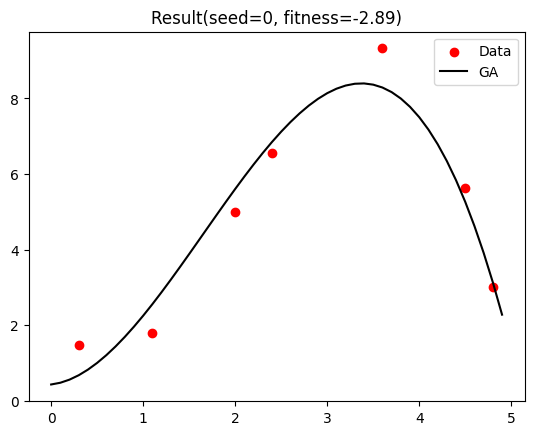

In [ ]:
# 후처리
x_line = np.arange(0, 5, 0.1) # 그래프에 우리가 추정한 모델을 그리기 위해 0 이상 5 이하의 범위에 0.1의 간격으로 X좌표 값의 리스트 생성
y_line = f(x_line, *top_individual) # X좌표 값에 각각 대응하는 모델의 추정치 계산 (3차식의 계수는 유전 알고리즘으로 구한 계수로 함)

plt.figure(1) # 그래프를 그리기 위해 이미지 객체 생성
plt.scatter(x_data, y_data, c='red', label='Data') # 데이터 정보를 점으로 표시
plt.plot(x_line, y_line, c='black', label='GA') # 추정치를 선 그래프로 표시
plt.legend() # 범례 생성
plt.title('Result(seed={0}, fitness={1})'.format(seed, round(top_fitness_record[-1],3))) # 제목 생성
plt.show() # 이미지 출력
